In [55]:
import pandas as pd
import numpy as np

## Data Exploration and Preprocessing

In [56]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. Handle Missing Values

    Drop missing rows (data.dropna()) or fill them (data.fillna()).

2. Feature Selection

    Choose numeric features (K-Means works with numbers only).
    
    If you have categorical features, convert them (e.g., one-hot encoding).

3. Scaling Features (Important!)

    K-Means uses distances (Euclidean).

    If one feature has bigger values (like salary vs age), it will dominate clustering.
    
    Use StandardScaler or MinMaxScaler.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [58]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_features=sc.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
df_scaled=pd.DataFrame(scaled_features,columns=['Age','Annual Income (k$)','Spending Score (1-100)'])
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [60]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False) # sparse=False gives NumPy array
ohe_gender=ohe.fit_transform(df[['Gender']])

ohe_gender_df=pd.DataFrame(ohe_gender,columns=ohe.get_feature_names_out(['Gender']))
ohe_gender_df.head()



,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [61]:
final_df=pd.concat([ohe_gender_df,df_scaled],axis=1)
final_df.head()

,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


## Model Building and Training

### Creating X Dataset

In [62]:
X= np.hstack((ohe_gender_df.values,df_scaled.values))
print("Size",X.shape)
X

Size (200, 5)


array([[ 0.        ,  1.        , -1.42456879, -1.73899919, -0.43480148],
       [ 0.        ,  1.        , -1.28103541, -1.73899919,  1.19570407],
       [ 1.        ,  0.        , -1.3528021 , -1.70082976, -1.71591298],
       [ 1.        ,  0.        , -1.13750203, -1.70082976,  1.04041783],
       [ 1.        ,  0.        , -0.56336851, -1.66266033, -0.39597992],
       [ 1.        ,  0.        , -1.20926872, -1.66266033,  1.00159627],
       [ 1.        ,  0.        , -0.27630176, -1.62449091, -1.71591298],
       [ 1.        ,  0.        , -1.13750203, -1.62449091,  1.70038436],
       [ 0.        ,  1.        ,  1.80493225, -1.58632148, -1.83237767],
       [ 1.        ,  0.        , -0.6351352 , -1.58632148,  0.84631002],
       [ 0.        ,  1.        ,  2.02023231, -1.58632148, -1.4053405 ],
       [ 1.        ,  0.        , -0.27630176, -1.58632148,  1.89449216],
       [ 1.        ,  0.        ,  1.37433211, -1.54815205, -1.36651894],
       [ 1.        ,  0.        , -1.0

### Using Elbow Method

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

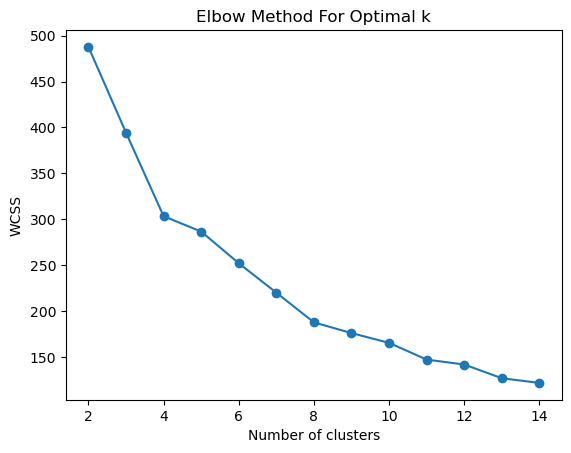

In [64]:
k=range(2,15)
wcss=[]
for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(k,wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### Using Silhouette Scoring

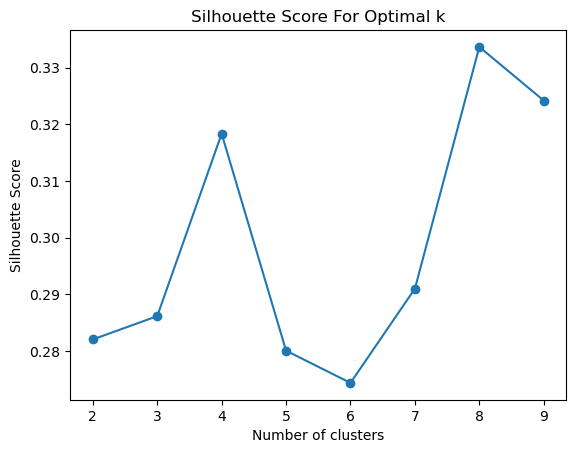

Best k is: 8


In [65]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
k=range(2,10)

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    score=silhouette_score(X,kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(k,silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

best_k=silhouette_scores.index(max(silhouette_scores))+2
print("Best k is:",best_k)

### Best K

From Silhouette Scoring and Elbow Method 
    We can conclude Best K i.e Best Cluster are 8

In [70]:
final_kmeans=KMeans(n_clusters=8,init='k-means++',random_state=42)
final_kmeans.fit(X)
labels=final_kmeans.labels_
labels

array([4, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 0, 4, 2, 4, 2, 4, 2, 4, 5, 4, 0, 6,
       2, 4, 5, 6, 6, 6, 5, 6, 6, 0, 5, 0, 5, 0, 6, 0, 0, 6, 5, 5, 0, 6,
       5, 5, 6, 6, 0, 5, 5, 5, 0, 6, 5, 0, 6, 5, 0, 6, 0, 5, 6, 0, 5, 6,
       6, 5, 5, 6, 0, 5, 6, 6, 5, 6, 0, 6, 6, 5, 0, 6, 0, 6, 5, 0, 0, 0,
       0, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 1, 6, 1, 7, 1, 0, 1, 7, 1,
       6, 1, 7, 1, 3, 1, 7, 1, 3, 1, 6, 1, 7, 1, 7, 1, 3, 1, 7, 1, 3, 1,
       3, 1, 7, 1, 7, 1, 5, 1, 7, 1, 7, 1, 7, 1, 3, 1, 7, 1, 7, 1, 3, 1,
       7, 1, 7, 1, 3, 1, 7, 1, 3, 1, 3, 1, 3, 1, 3, 1, 7, 1, 3, 1, 3, 1,
       7, 1], dtype=int32)

In [71]:
plot_df = final_df.copy()
plot_df['cluster'] = labels
plot_df.head()

,Gender_Female,Gender_Male,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.0,1.0,-1.424569,-1.738999,-0.434801,4
1,0.0,1.0,-1.281035,-1.738999,1.195704,4
2,1.0,0.0,-1.352802,-1.700830,-1.715913,2
3,1.0,0.0,-1.137502,-1.700830,1.040418,4
4,1.0,0.0,-0.563369,-1.662660,-0.395980,2


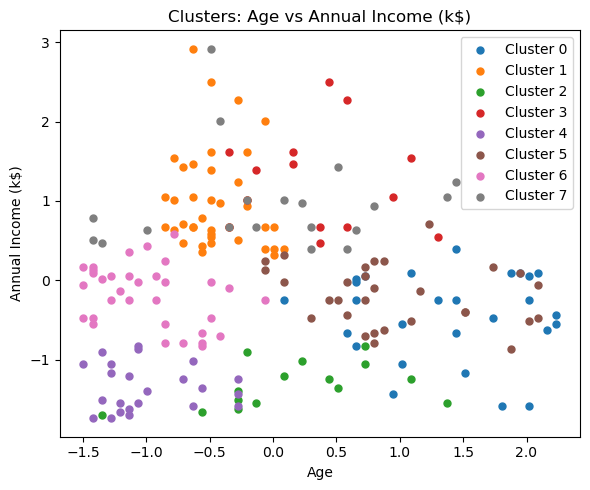

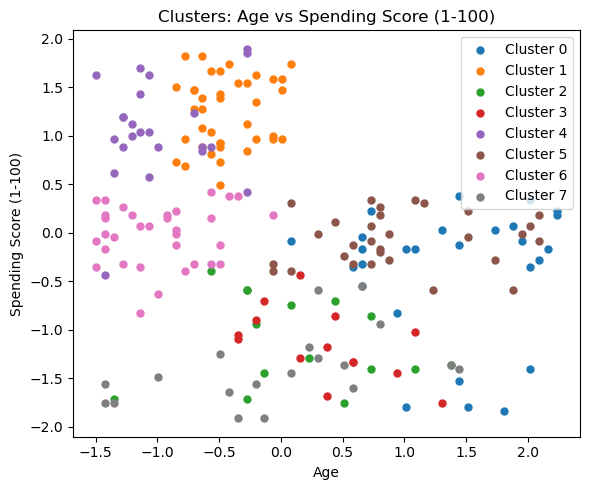

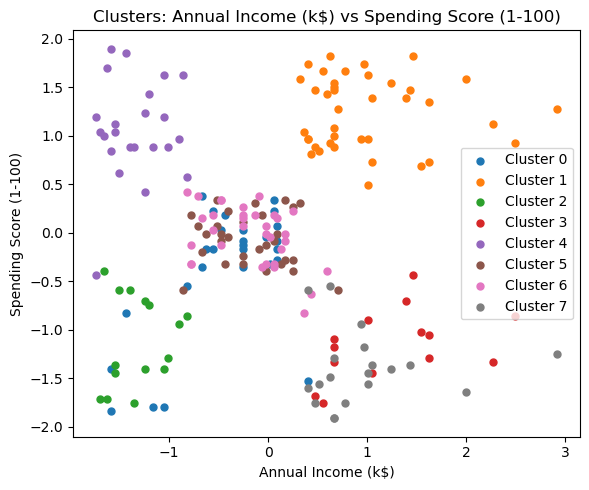

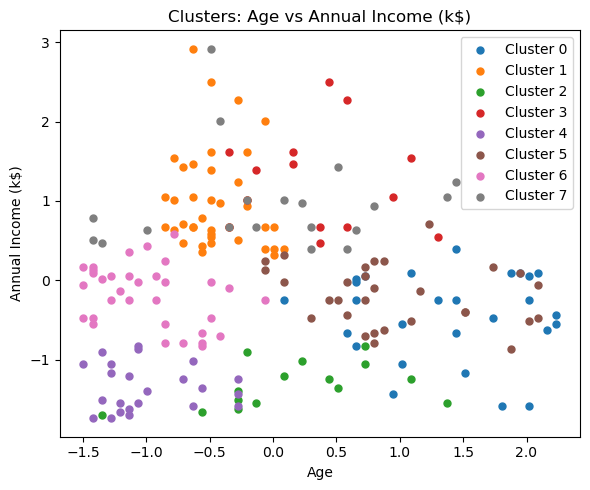

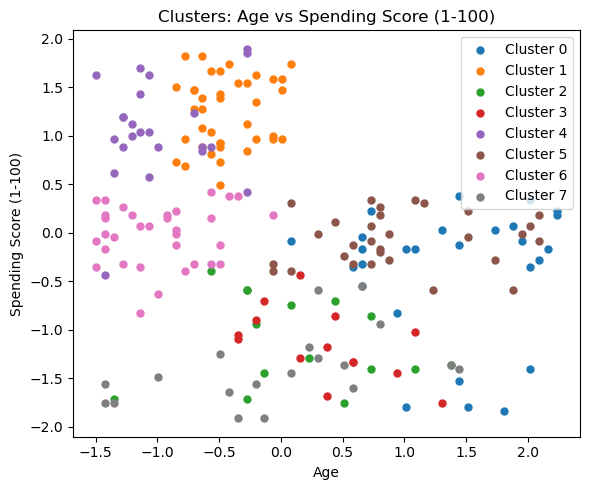

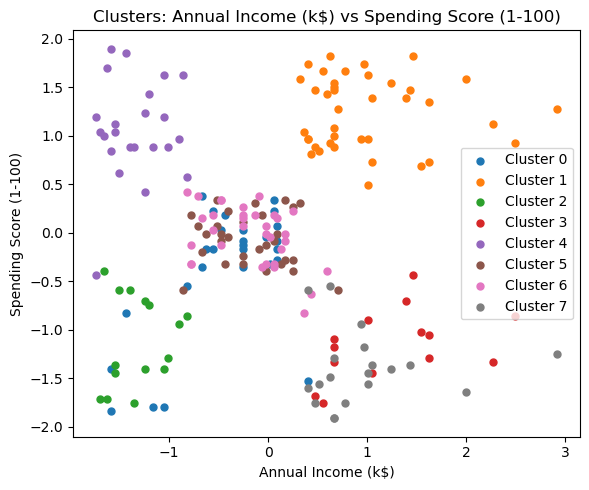

In [78]:
import matplotlib.pyplot as plt
import itertools

# pick only numeric columns (your scaled ones)
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# add cluster labels back
tmp = pd.concat([df_scaled[num_cols], pd.Series(labels, name='cluster')], axis=1)

# generate all unique pairs of numeric columns
pairs = list(itertools.combinations(num_cols, 2))

# loop through pairs and plot
for x_col, y_col in pairs:
    plt.figure(figsize=(6,5))
    for c in sorted(tmp['cluster'].unique()):
        sub = tmp[tmp['cluster'] == c]
        plt.scatter(sub[x_col], sub[y_col], label=f'Cluster {c}', s=25)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Clusters: {x_col} vs {y_col}')
    plt.legend()
    plt.tight_layout()
    plt.show()
import matplotlib.pyplot as plt
import itertools

# pick only numeric columns (your scaled ones)
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# add cluster labels back
tmp = pd.concat([df_scaled[num_cols], pd.Series(labels, name='cluster')], axis=1)

# generate all unique pairs of numeric columns
pairs = list(itertools.combinations(num_cols, 2))

# loop through pairs and plot
for x_col, y_col in pairs:
    plt.figure(figsize=(6,5))
    for c in sorted(tmp['cluster'].unique()):
        sub = tmp[tmp['cluster'] == c]
        plt.scatter(sub[x_col], sub[y_col], label=f'Cluster {c}', s=25)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Clusters: {x_col} vs {y_col}')
    plt.legend()
    plt.tight_layout()
    plt.show()